# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete



## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time.

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.


## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting.

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading
2. Cleaning, transforming, and visualizing
3. Modeling
4. Evaluating and concluding


### 1. Sourcing and Loading

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries.

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One.

#### 1.1. Importing Libraries

In [235]:
# Let's import the pandas, numpy libraries as pd, and np respectively.
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt
from matplotlib import pyplot as plt
import seaborn as sb

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets.

In [236]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

londondt_url = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file.
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.
london_raw = pd.read_excel(londondt_url, sheet_name='Average price', index_col= None)


### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy:

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer.



***Hint:*** This part of the data science pipeline should test those skills you acquired in:
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules.
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data**

Think about your pandas functions for checking out a dataframe.

In [237]:
print("Attributes of data:")
print(london_raw.shape)
print(london_raw.index)

print("\n\n\n")
print(london_raw.head())


Attributes of data:
(355, 49)
RangeIndex(start=0, stop=355, step=1)




  Unnamed: 0 City of London Barking & Dagenham       Barnet       Bexley  \
0        NaT      E09000001          E09000002    E09000003    E09000004   
1 1995-01-01    91448.98487         50460.2266  93284.51832  64958.09036   
2 1995-02-01    82202.77314        51085.77983  93190.16963  64787.92069   
3 1995-03-01    79120.70256        51268.96956  92247.52435  64367.49344   
4 1995-04-01    77101.20804        53133.50526  90762.87492  64277.66881   

         Brent      Bromley       Camden      Croydon       Ealing  ...  \
0    E09000005    E09000006    E09000007    E09000008    E09000009  ...   
1  71306.56698  81671.47692  120932.8881  69158.16225  79885.89069  ...   
2  72022.26197  81657.55944  119508.8622  68951.09542  80897.06551  ...   
3  72015.76274  81449.31143  120282.2131  68712.44341  81379.86288  ...   
4  72965.63094  81124.41227   120097.899  68610.04641  82188.90498  ...   

    NORTH WEST YORKS

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [238]:
# Skip the 1st row & Drop unnamed columns
londondt_clean = london_raw.iloc[1:].\
                 dropna(axis=1, how="all")

**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [239]:
# Rename columns (title case applied)
londondt_clean.columns = ['date'] + [col.title() for col in londondt_clean.columns[1:]]
londondt_clean.columns


Index(['date', 'City Of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston Upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond Upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Inner London', 'Outer London', 'North East',
       'North West', 'Yorks & The Humber', 'East Midlands', 'West Midlands',
       'East Of England', 'London', 'South East', 'South West', 'England'],
      dtype='object')

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data?

You might need to **melt** your DataFrame here.

In [240]:
# Reshape data to long-form (with date as ID)
londondt_wide = londondt_clean.melt(id_vars="date", value_name="avg_price", var_name="borough")


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers...

In [241]:
# List of boroughs was obtained from the site: https://trustforlondon.org.uk/data/boroughs/

# NOTE: 'City of London' is not an official borough. It along with the 32 recognized
# boroughs constitute the Greater London (administrative area)

bor_official = [bor.title() for bor in ["Barking & Dagenham","Barnet","Bexley","Brent","Bromley","Camden","Croydon","Ealing","Enfield","Greenwich","Hackney","Hammersmith & Fulham","Haringey","Harrow","Havering","Hillingdon","Hounslow","Islington","Kensington & Chelsea","Kingston upon Thames","Lambeth","Lewisham","Merton","Newham","Redbridge","Richmond upon Thames","Southwark","Sutton","Tower Hamlets","Waltham Forest","Wandsworth","Westminster"]]
bor_dt = list(londondt_wide['borough'].unique())
bor_omit = [x for x in bor_dt if x not in bor_official]

londondt = londondt_wide.loc[~londondt_wide["borough"].isin(bor_omit)]

londondt.loc[:, 'avg_price'] = pd.to_numeric(londondt['avg_price'])

# **2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column?

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit.

# **2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

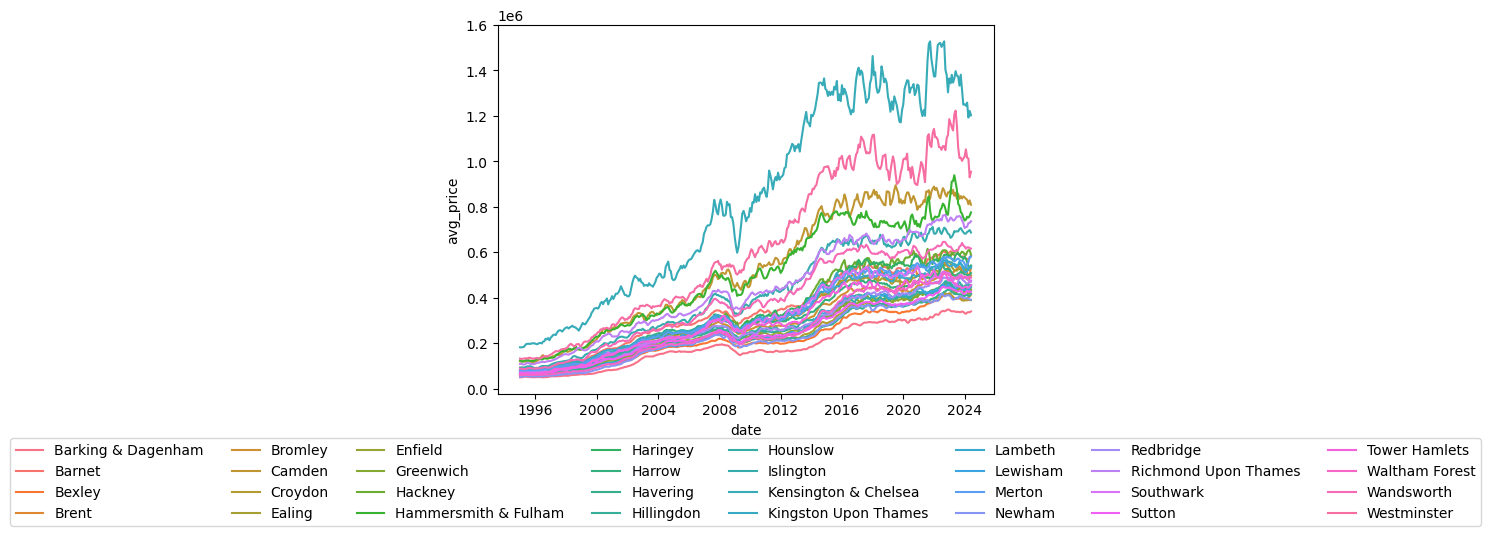

In [242]:
#Observing general price fluctuations per borough, over the years
sb.lineplot(data=londondt, x="date", y="avg_price", hue="borough")
plt.legend( loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=8)
plt.show()


To limit the number of data points you have, you might want to extract the year from every month value your *Month* column.

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column
3. store that corresponding year as separate column.

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades?

In [251]:

date_range1 = londondt.groupby("borough", as_index=False).agg(
                min_date = ('date','min'),
                max_date = ('date','max') )

date_range2 = pd.melt(date_range1, id_vars="borough", value_name="date",
                      var_name="type", value_vars=["min_date","max_date"]).\
              merge(londondt, on=["borough","date"], how="right", indicator=True).\
              query(" _merge=='both' ").\
              pivot(index="borough", columns="type", values="avg_price")

date_range2.loc[:, 'maxdate_range'] = date_range2['max_date']/date_range2['min_date']
date_range2.drop(['max_date', 'min_date'], axis=1, inplace=True)

price_range1 = londondt.copy()
price_range1.loc[:, 'maxprice_range'] = price_range1.groupby('borough')['avg_price'].transform(lambda x:x.max()/x.min())
price_range2 = price_range1.loc[:, ["borough","maxprice_range"]].drop_duplicates().set_index("borough")

plotdt = price_range2.merge(date_range2, how="inner", left_index=True, right_index=True)

print("Foldchange over the past 20 years:")
print( plotdt.loc[:, "maxdate_range"].sort_values(ascending=False).head(5) )

print("\n\nHighest foldchange:")
print( plotdt.loc[:, "maxprice_range"].sort_values(ascending=False).head(5) )


Foldchange over the past 20 years:
borough
Hackney           9.623253
Waltham Forest    7.962873
Lambeth           7.858879
Tower Hamlets     7.623378
Brent             7.561435
Name: maxdate_range, dtype: object


Highest foldchange:
borough
Hackney          10.039215
Westminster       9.305444
Southwark         8.855392
Tower Hamlets     8.718706
Lambeth           8.635269
Name: maxprice_range, dtype: float64


**3. Modeling**



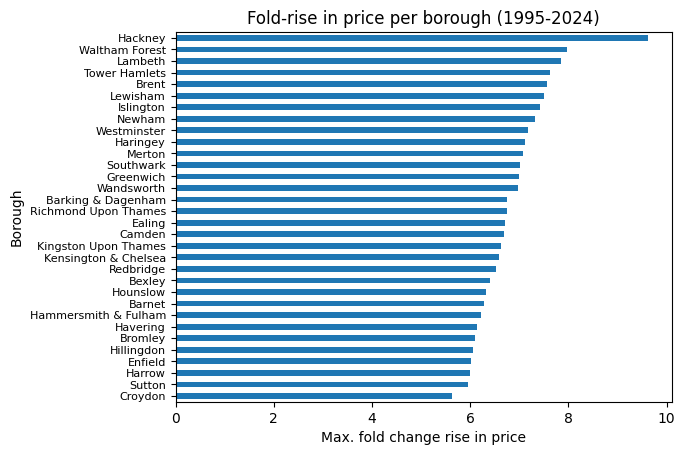

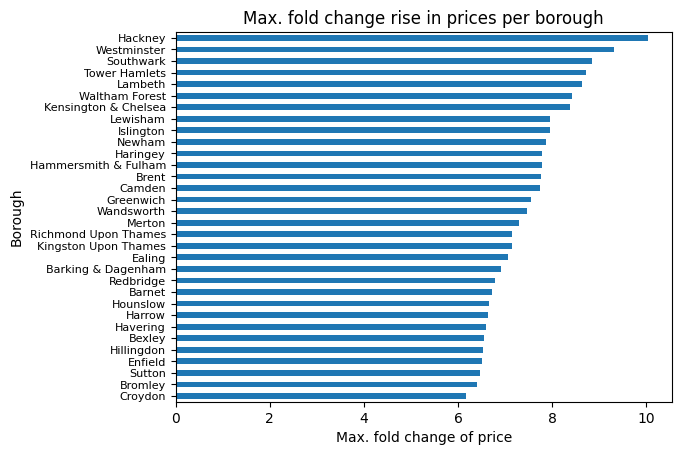

In [244]:
# Borough fold-change price rise over the 20 yrs
plotdt_sorteddate = plotdt.sort_values("maxdate_range", ascending=True)

plotdt_sorteddate.plot(kind="barh", y="maxdate_range")
plt.title("Fold-rise in price per borough (1995-2024)")
plt.xlabel("Max. fold change rise in price")
plt.ylabel("Borough")
plt.legend([], frameon=False)
plt.yticks(fontsize=8)


#Borough with most price change
plotdt_sortedprice = plotdt.sort_values("maxprice_range", ascending=True)

plotdt_sortedprice.plot(kind="barh", y="maxprice_range")
plt.title("Max. fold change rise in prices per borough")
plt.xlabel("Max. fold change of price")
plt.ylabel("Borough")
plt.legend([], frameon=False)
plt.yticks(fontsize=8)


plt.show()


### **Additional trends observed in data:**

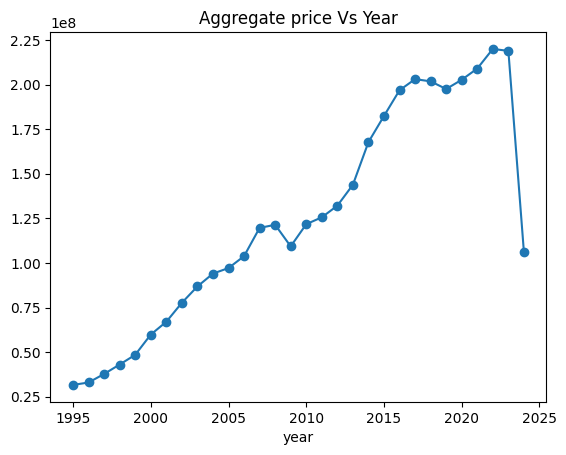

In [245]:
### Aggregate price Vs Year

plotdt_year = londondt.copy()

plotdt_year.loc[:, 'year'] = plotdt_month['date'].dt.year

plotdt_year.groupby(["year"])["avg_price"].sum().\
    sort_index().\
    plot(kind="line", y="avg_price", marker="o")
plt.title("Aggregate price Vs Year")

plt.show()


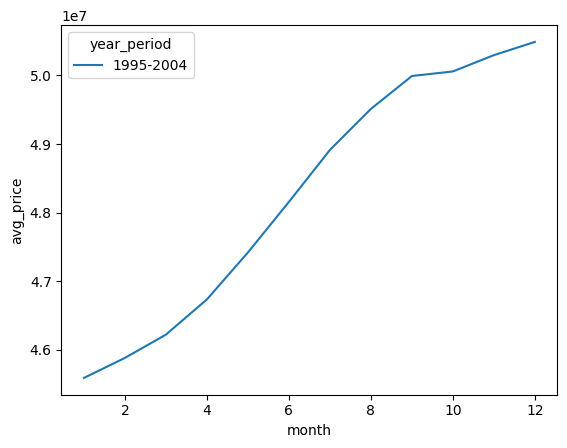

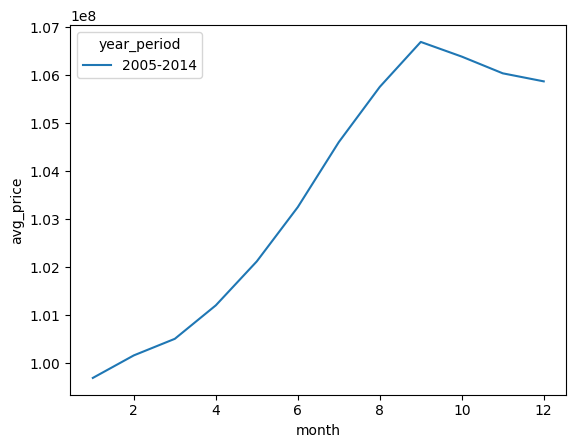

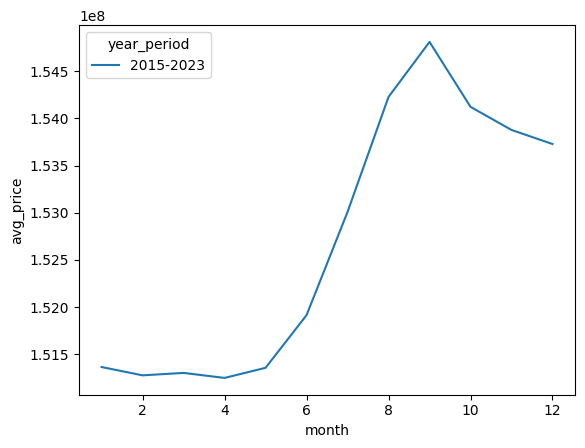

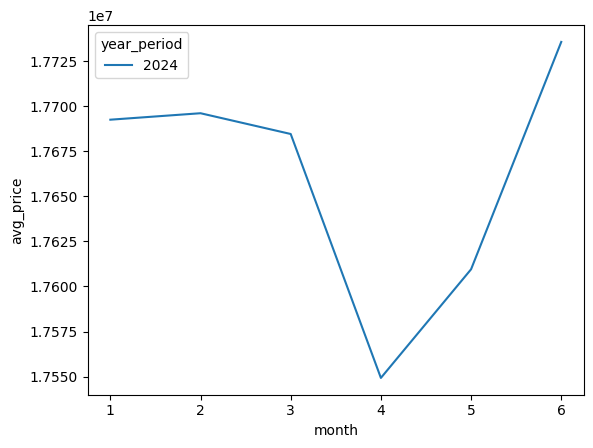

In [246]:
plotdt_month.loc[:, 'month'] = plotdt_month['date'].dt.month

plotdt_month2 = pd.DataFrame(plotdt_month.groupby(["year_period","month"], as_index=False)["avg_price"].sum().\
    sort_values(["year_period","month"])).\
    set_index("year_period")

### Line plots over fixed intervals: Average prices vs. Month
# 1995-2004 interval:
sb.lineplot(data=plotdt_month2.loc["1995-2004"], x="month", y="avg_price", hue="year_period")
plt.show()

# 2005-2014 interval:
sb.lineplot(data=plotdt_month2.loc["2005-2014"], x="month", y="avg_price", hue="year_period")
plt.show()

# 2015-2023 interval:
sb.lineplot(data=plotdt_month2.loc["2015-2023"], x="month", y="avg_price", hue="year_period")
plt.show()

# 2024 interval: This year showed a significant disruption in price trend (from
# previous plot), and behaves as a outlier w.r.t. the remaining 19 years. Thus,
# its plotted seperately
sb.lineplot(data=plotdt_month2.loc[("2024")], x="month", y="avg_price", hue="year_period")
plt.show()


### 4. Conclusion
What can you conclude? Type out your conclusion below.



---



The data was analysed for only the 32 known boroughs of London. The rest 13 boroughs which are not recognized were dropped from the dataset (including the 'City of London'). Besides that, the data was cleaned off of all blank unnamed columns. The cleaned data was transformed and made ready for analysis.

It was observed that ***Hackney*** clearly had the highest fold-rise in average prices, both in terms of:

*   Highest foldchange (= highest value/least value)
*   foldchange over the past 20 years (= Avg price on 2024-06-01/Avg. price on 1995-01-01)

**Trends observed in data:**

*   While the prices have more or less shown a steady increase over the years, 2014-2018 period marks a drastic rise.
*   The avg. prices plummeted in 2024 (marking it an abnormality in general trend)
*   A month-wise comparison of prices indicate a build up of prices from Jan onwards, with a peak at either Sep/Dec. 2024 exhibits a unique trend of its own (over the months).

### **Future analysis:**
These price trends could be further analyzed to identify the most sought after neighborhoods, and those which had the fastest rise in avg. prices (by plotting log-transformed Avg. Prices vs. Year)